# Count the spots!
For Brayden Bagla

with help from PyImageSearch

## Introduction

My young cousin was playing with [fusible plastic beads](http://www.perlest.com/). He had a pegboard of a dinosaur and I asked him a simple question:

"How many beads do you need for this one?"

He responded, "I don't know! Could you write a program to count the spots?"

## Finding the right tools

No programmer works alone. Every single person depends on things other people have built.

This is true everywhere! In most paintings, someone besides the artist made the paint and the canvas. We all rely on each other's work to make cool things :)

 Here, I'm using the language Python and a few extra packages to handle images. I also looked at a [tutorial]((https://www.pyimagesearch.com/2016/10/31/detecting-multiple-bright-spots-in-an-image-with-python-and-opencv/) to help me solve this puzzle.

In [1]:
## First, let's make sure it's Python 3
import sys
print(sys.version)

3.6.4 (default, Jan  6 2018, 11:51:15) 
[GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.39.2)]


In [2]:
## Import the necessary packages
%matplotlib inline
import matplotlib.pyplot as plt
from imutils import contours
from skimage import measure
import numpy as np
import argparse
import imutils
import cv2

## Looking at the image

Let's load up the image, and see what we can do with it.

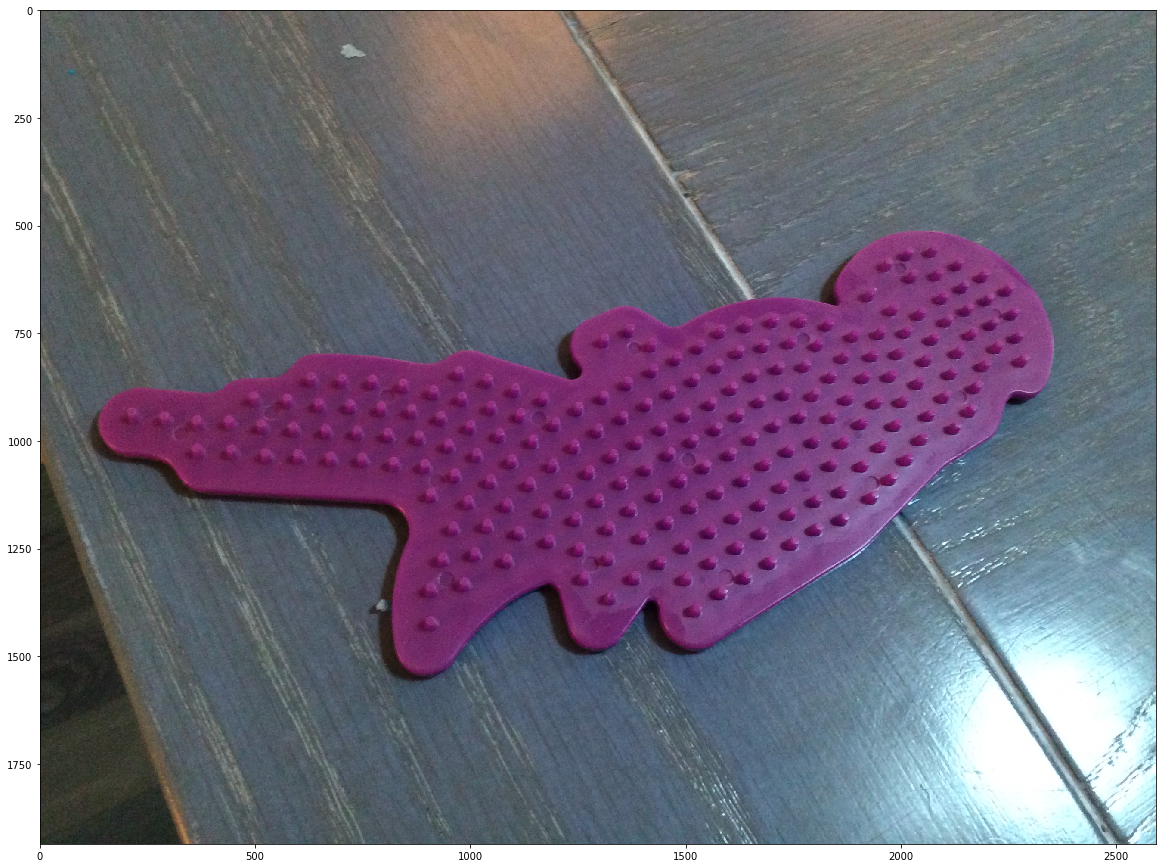

In [3]:
## Loading the image
args = {}
args["image"] = "./IMG_0747.JPG"
image = cv2.imread(args["image"])
## Plotting the image
plt.figure(figsize=(20,20))
plt.imshow(image)

Notice that each peg has a small dark shadow. Let's try to count those dark spots.

Because we're interested in brightness, I'm going to convert the image to grayscale, and smooth out the colors.

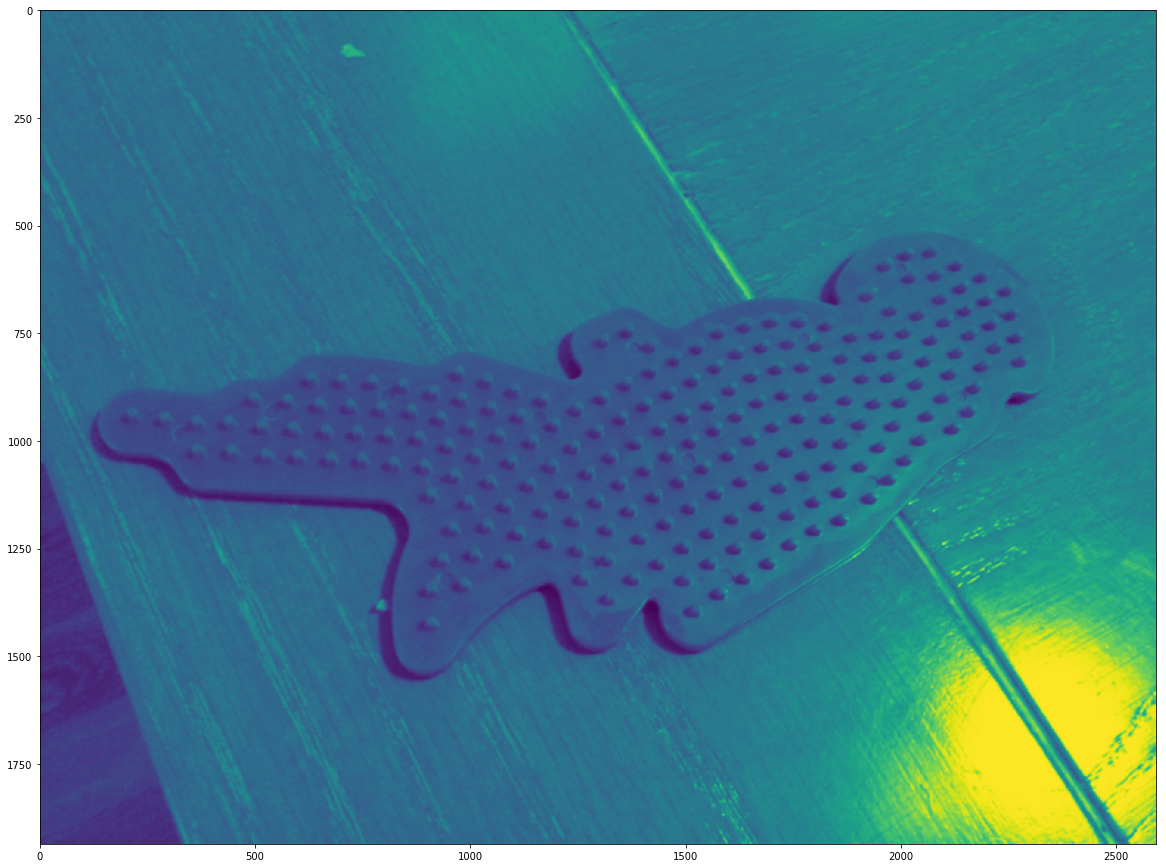

In [4]:
## Convert it to grayscale, and blur it
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (11, 11), 0)
## Plot the blurred image
plt.figure(figsize=(20,20))
plt.imshow(blurred)

## Thresholding

I only want to look at dark spots on the dinosaur. We can separate these out with a concept called "thresholding".
This will go through each part of the image and sort it into "light" and "dark".

Here, I'm going to send any bright pixel to yellow, and any dark pixel to purple. Check it out!

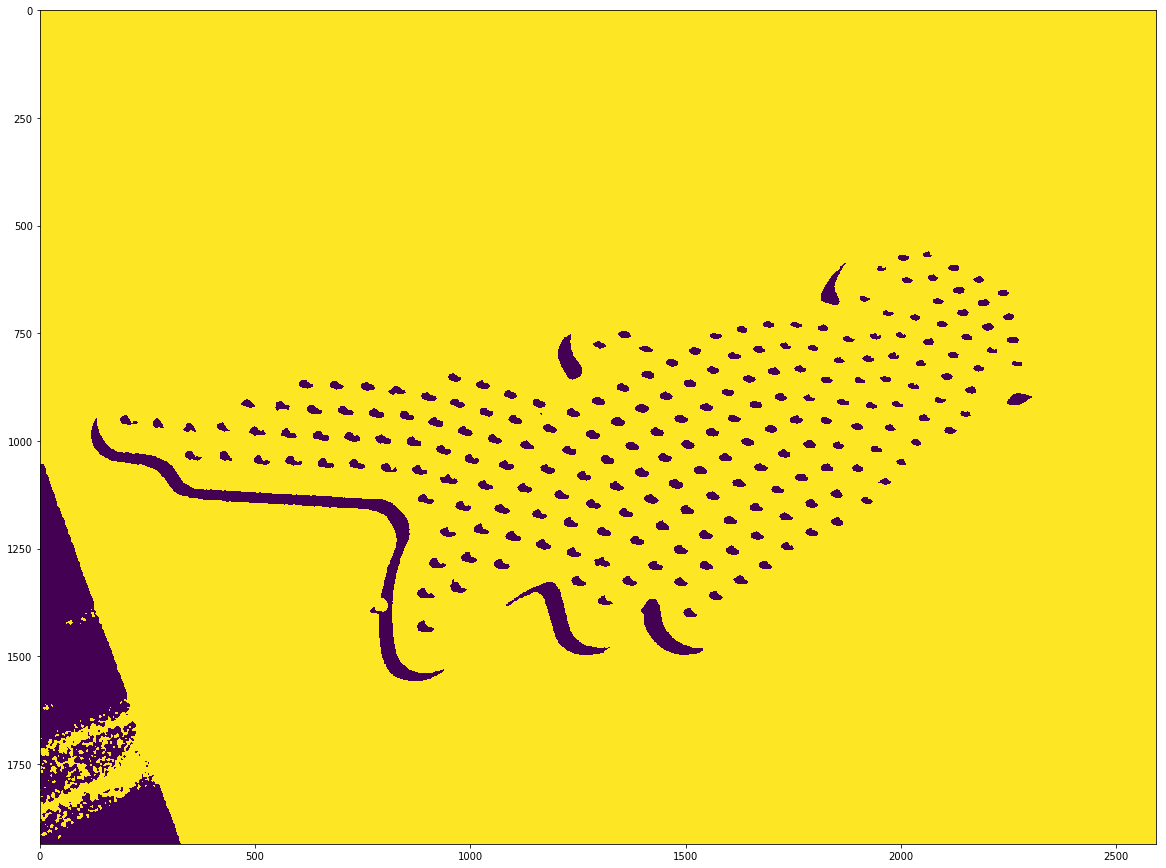

In [5]:
## Let's send pixels above a certain brightness to yellow, and the rest to purple.
thresh = cv2.threshold(blurred, 50, 255, cv2.THRESH_BINARY)[1]
plt.figure(figsize=(20,20))
plt.imshow(thresh)

Let's flip it around, so the spots are yellow and the background is purple.

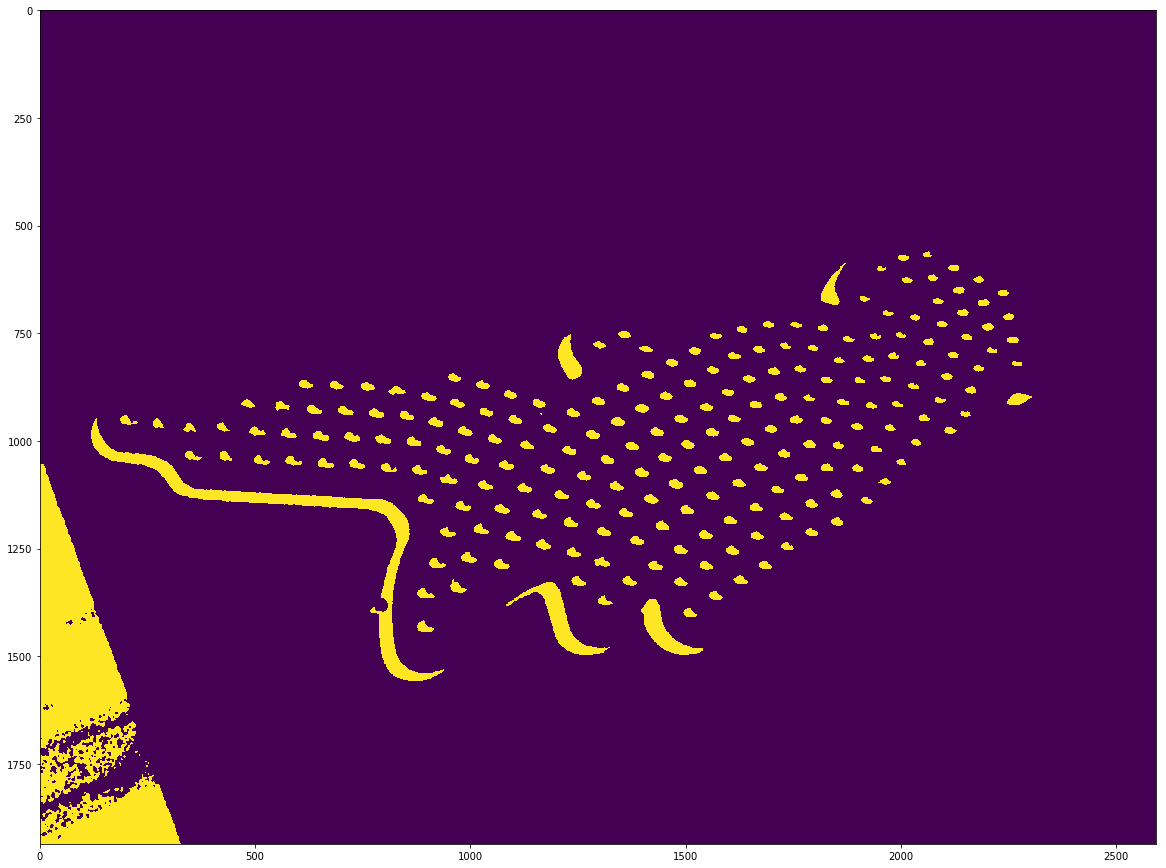

In [6]:
## You can see the spots we're trying to count! 
## Let's invert the image to make those spots bright.
thresh = cv2.bitwise_not(thresh)
plt.figure(figsize=(20,20))
plt.imshow(thresh)

You can see the spots now, but I want to make sure we only see the spots. 

I'm going to do an analysis. It will find all the yellow spots, but only keep them if they're the right size.

In [7]:
## We're going to do a connected component analysis.
## We'll keep components only if they're not too small and not too large.

labels = measure.label(thresh, neighbors=8, background=0)
mask = np.zeros(thresh.shape, dtype="uint8")

# loop over the unique components
for label in np.unique(labels):
    # if this is the background, ignore it
    if label == 0:
        continue
 
    # otherwise, construct the label mask and count the number of pixels 
    labelMask = np.zeros(thresh.shape, dtype="uint8")
    labelMask[labels == label] = 255
    numPixels = cv2.countNonZero(labelMask)
    # if the number of pixels in the component is large (but not too large),
    # then add it to our mask of "spots"
    if numPixels > 150 and numPixels < 1000:
        mask = cv2.add(mask, labelMask)

How does it look? You can compare with the last picture to make sure.

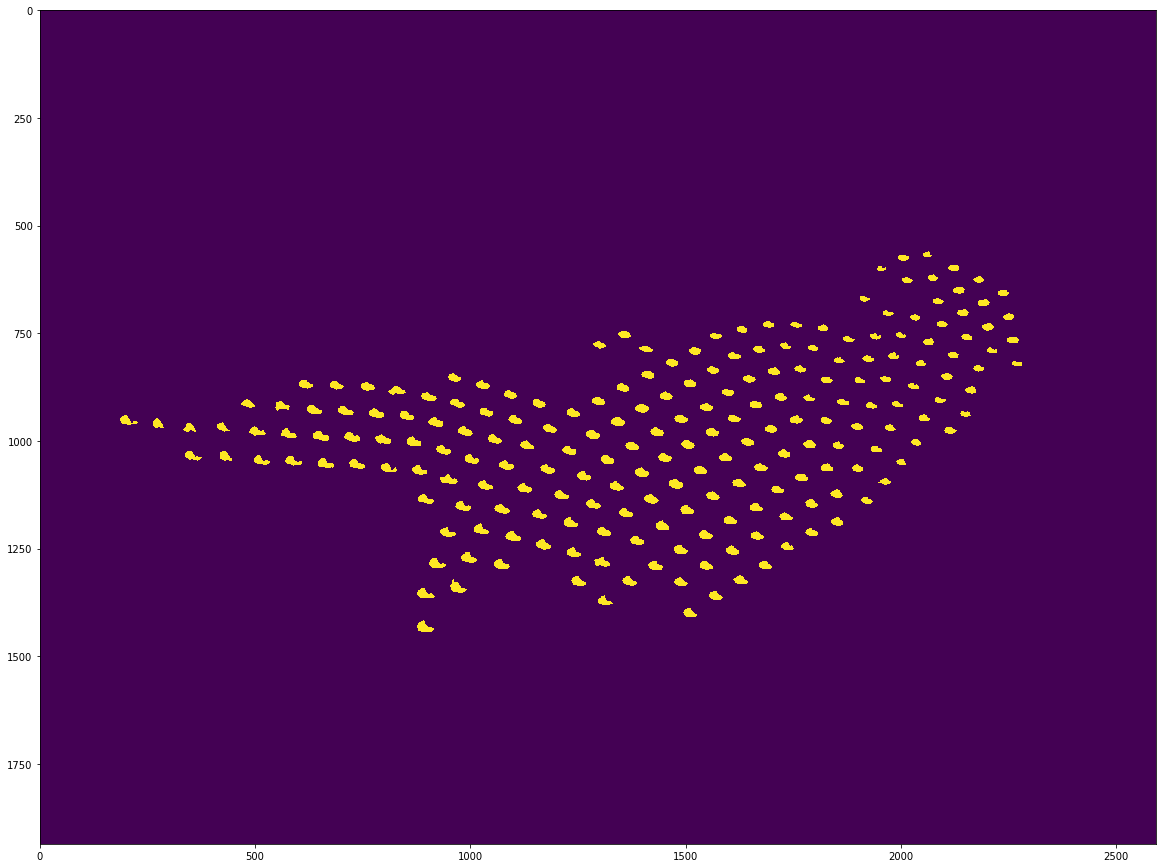

In [8]:
## Plotting image
plt.figure(figsize=(20,20))
plt.imshow(mask)

## Counting it all up

Let's mark each spot and check with the original image. That way, we can be sure we didn't miss any spots.

In [9]:
# find the contours in the mask, then sort them from left to right
image = cv2.imread(args["image"])

cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]
cnts = contours.sort_contours(cnts)[0]
 
# loop over the contours
for (i, c) in enumerate(cnts):
    # draw the bright spot on the image
    (x, y, w, h) = cv2.boundingRect(c)
    ((cX, cY), radius) = cv2.minEnclosingCircle(c)
    cv2.circle(image, (int(cX), int(cY)), int(radius*1.2), (0, 0, 255), 3)
    cv2.putText(image, "#{}".format(i + 1), (x, y - 15),
        cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
 

Here it is! Look closely and you'll see each spot is numbered and circled.

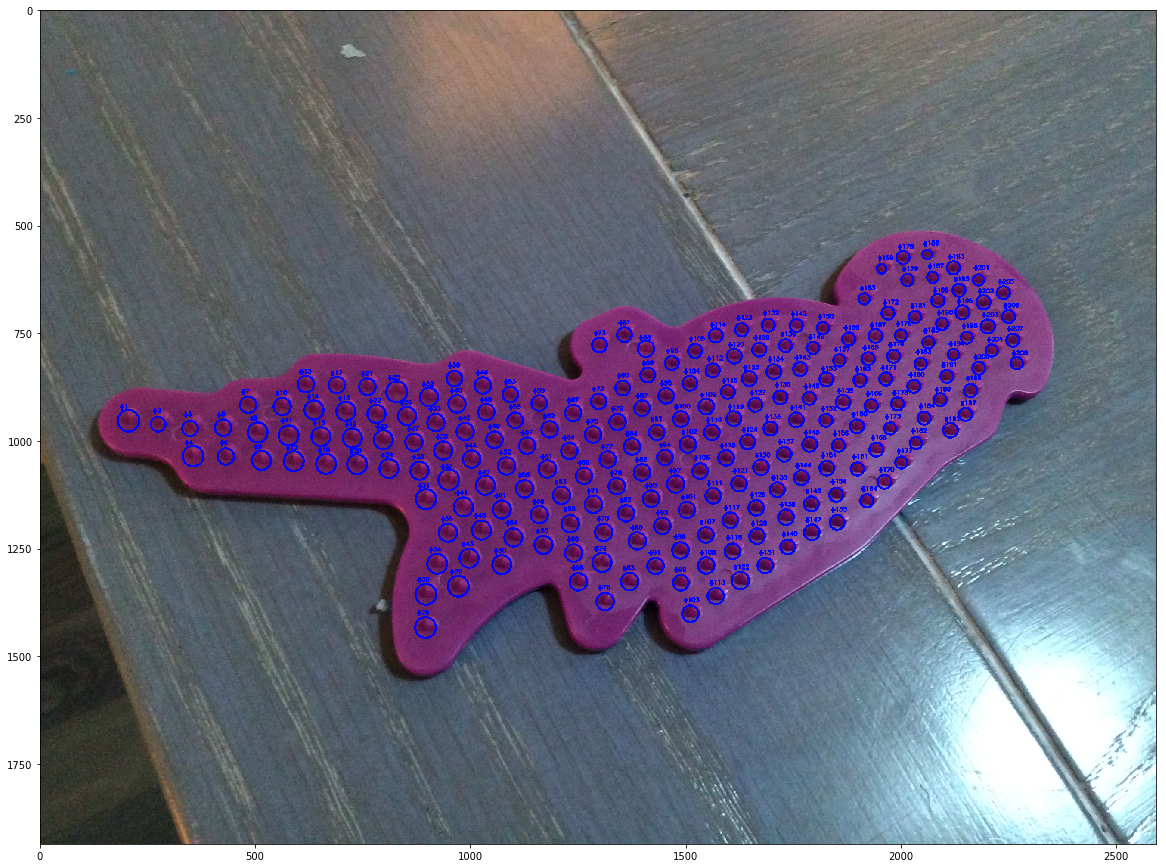

In [10]:
## Plotting image
plt.figure(figsize=(20,20))
plt.imshow(image)

## The answer

How many spots are there?

In [11]:
## Counts up each all the contours
print("There are " + str(len(cnts)) + " spots!")

There are 208 spots!


Now that we have this program, we can count the spots of any pegboard you like! We only have to change the original picture. 

If you send me a picture of a different pegboard, I can count that one, too!

## For fun

You can use these tools to make cool pictures. Don't be afraid to have fun!

I made this image when I was trying to find the right threshold for the spots.

(-0.5, 2591.5, 1935.5, -0.5)

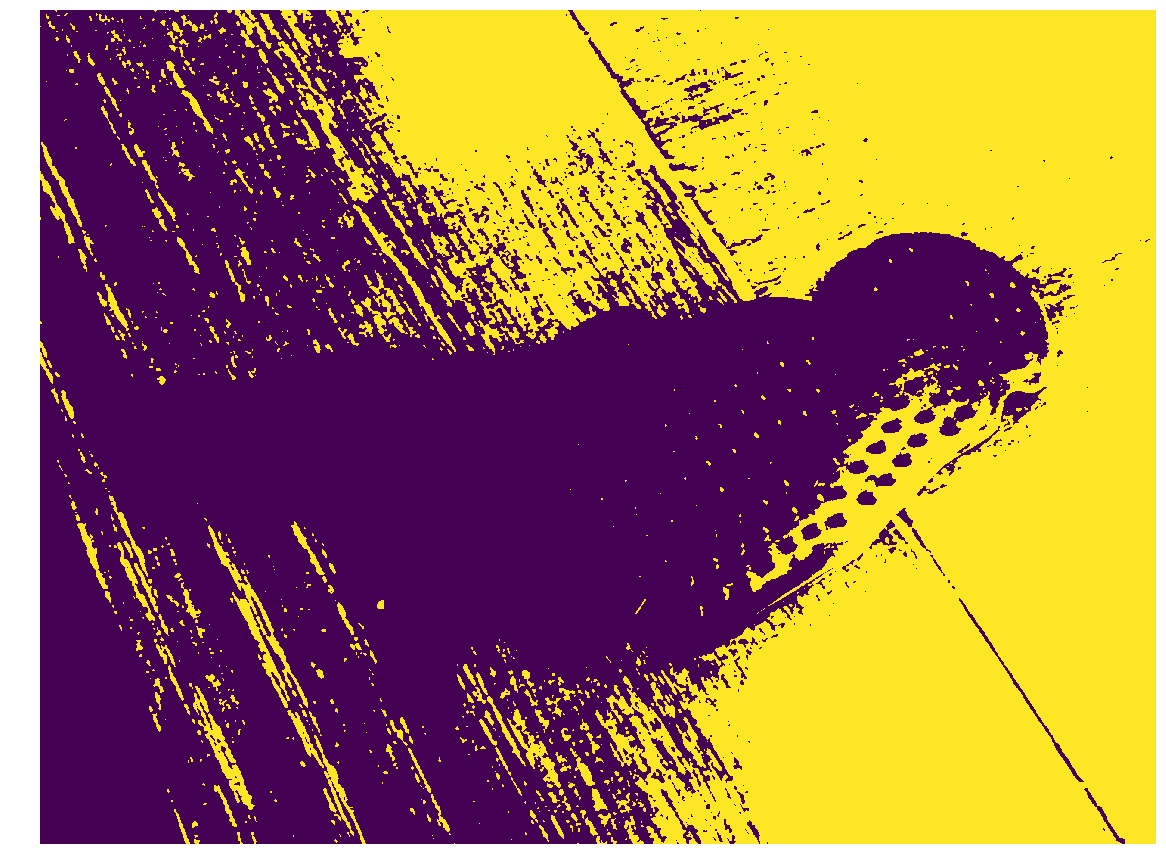

In [12]:
## Different thresholding value
fun = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY)[1]
## Plotting image
plt.figure(figsize=(20,20))
plt.imshow(fun)
plt.axis('off')

That's all, folks! Have a nice day!